# Support Vector Machines

A  Support  Vector  Machine  (SVM)  is  a  powerful  and  versatile  Machine  Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. It is one of the most popular models in Machine Learning, and any one interested in Machine Learning should have it in their toolbox. SVMs are particularly well suited for classification of complex small- or medium-sized datasets.

## Linear SVM Classification

The fundamental idea behind SVMs is best explained with some pictures. Figure below shows  part  of  the  iris  dataset.  The  two classes can clearly be separated easily with a straight line (they are linearly separable). The  left  plot  shows  the  decision  boundaries  of  three  possible  linear  classifiers.  The model  whose  decision  boundary  is  represented  by  the  dashed  line  is  so  bad  that  it does not even separate the classes properly. The other two models work perfectly on this  training  set,  but  their  decision  boundaries  come  so  close  to  the  instances  that these  models  will  probably  not  perform  as  well  on  new  instances.  In  contrast,  the solid line in the plot on the right represents the decision boundary of an SVM classifier;  this  line  not  only  separates  the  two  classes  but  also  stays  as  far  away  from  the closest training instances as possible. You can think of an SVM classifier as fitting the widest  possible  street  (represented  by  the  parallel  dashed  lines)  between  the  classes. This is called large margin classification.

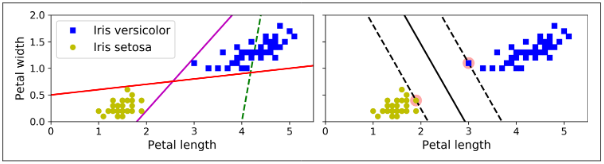

Notice that adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge  of  the  street.  These  instances  are  called  the  support  vectors (circled in figure below).

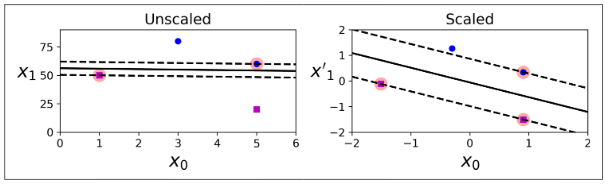

SVMs are sensative to the feature scales.